## Podstawy Uczenia Maszynowego
---
Projekt poprawiający ocenę z laboratorium 1 i 2.

Autor: Magdalena Jaśkiewicz 233968

### Opis badań
---
<p><div style="text-align: justify">Celem projektu jest wybór najlepszego klasyfikatora (spośród: NN, kNN, NM), podczas rozwiązywania problemu automatycznej klasyfikacji próbek białego wina pod względem jakości na podstawie danych fizykochemicznych. Wybrany zbiór danych pochodzi ze strony UCI Machine Learning Repository.</div></p>

<p><div style="text-align: justify">Określanie jakości wina odbywa się organoleptycznie bądź poprzez analizę składu chemicznego. Ocenę jakości na podstawie analizy chemicznej można usprawnić wykorzystując klasyfikację minimalnoodległościową.</div></p>

### Informacje o zbiorze danych:
---
Nazwa: Wine Quality Data Set - winequality-white
https://archive.ics.uci.edu/ml/datasets/wine+quality

Cechy (dane fizykochemiczne):
- 1 - ustalona kwasowość
- 2 - kwasowość lotna
- 3 - kwas cytrynowy
- 4 - cukier resztkowy
- 5 - chlorki
- 6 - wolny dwultlenek siarki
- 7 - całkowity dwutlenek siarki
- 8 - gęstość
- 9 - pH
- 10 - siarczany
- 11 - alkohol

Etykieta (określona na podstawie badań organoleptycznych):
- 12 - jakość (wynik od 0 do 10)

Postawiony problem: klasyfikacja próbek wina pod względem jakości będącej daną sensoryczną na podstawie danych fizykochemicznych.

In [1]:
# Import potrzebnych bibliotek
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, plot_confusion_matrix, multilabel_confusion_matrix, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.cluster import KMeans
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sn
from scipy.stats import mode

In [2]:
# Wczytywanie danych
ok=False
while ok==False:
    FileName = input('Wpisz ścieżkę do pliku: ')

    try:
        data=pd.read_csv(FileName, header=0, sep=";") 
        ok=True
    except FileNotFoundError:
        print('Nieprawidłowa ścieżka. Spróbuj ponownie: ')
        ok=False
#C:/Users/Ryzen/Desktop/PŁ/II stopień/PUM/projekt/winequality-white.csv

Wpisz ścieżkę do pliku: C:/Users/Ryzen/Desktop/PŁ/II stopień/PUM/projekt/winequality-white.csv


In [3]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


### Eksploracja zbioru danych

In [4]:
# Podział na zbiór danych i etykiety
X = data.iloc[:, :11]
Y = data.quality

In [5]:
# Sprawdzenie ilości klas w zestawie danych
quality_number = np.unique(Y)
print(quality_number)

[3 4 5 6 7 8 9]


**Wniosek:** Zbiór zawiera próbki 7 klas - próbki wina białego o jakości z przedziału: [3,9].

In [6]:
# Ilość próbek w każdej z klas
summary_of_class_quantity = data['quality'].value_counts()
print(summary_of_class_quantity)

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64


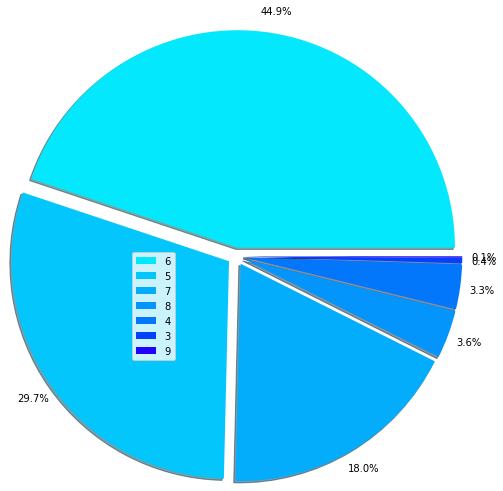

In [7]:
# Wykres kołowy procentowej zawartości próbek każdej z klas w zbiorze
pie_labels = [6, 5, 7, 8, 4, 3, 9]
explode_pie = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)
colors = ["#03e8fc", "#03c6fc", "#03adfc", "#0394fc", "#0377fc", "#0341fc", "#2003fc"]

plt.pie(summary_of_class_quantity, explode=explode_pie, labels=pie_labels, labeldistance=None, autopct='%1.1f%%', pctdistance=1.1, colors=colors, shadow=True, radius=2.5)
plt.legend()
plt.show()

In [8]:
summary_of_class_quantity[5]

1457

<p><div style="text-align: justify"><strong>Wnioski:</strong> Prawie połowę wszystkich próbek w zbiorze danych stanowią próbki wina białego o jakości 6 (44,9%), prawie jedną trzecią próbek stanowią próbki wina białego o jakości 5, a niecałą piątą część zbioru - próbki wina białego o jakości 7. Najmniejszą ilością próbek cechują się wina o jakości 3 i 9 (poniżej 0,5%) - to właśnie próbki tych klas mogą się okazać najtrudniejsze w poprawnym sklasyfikowaniu.

In [9]:
# Normalizacja danych
X = (X-np.tile(np.min(X,axis=0), (X.shape[0],1))) / (np.tile(np.max(X,axis=0)-np.min(X,axis=0), (X.shape[0],1)))
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.307692,0.186275,0.216867,0.308282,0.106825,0.149826,0.373550,0.267785,0.254545,0.267442,0.129032
1,0.240385,0.215686,0.204819,0.015337,0.118694,0.041812,0.285383,0.132832,0.527273,0.313953,0.241935
2,0.413462,0.196078,0.240964,0.096626,0.121662,0.097561,0.204176,0.154039,0.490909,0.255814,0.338710
3,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452
4,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452
...,...,...,...,...,...,...,...,...,...,...,...
4893,0.230769,0.127451,0.174699,0.015337,0.089021,0.076655,0.192575,0.077694,0.500000,0.325581,0.516129
4894,0.269231,0.235294,0.216867,0.113497,0.112760,0.191638,0.368910,0.150183,0.390909,0.279070,0.258065
4895,0.259615,0.156863,0.114458,0.009202,0.094955,0.097561,0.236659,0.104685,0.245455,0.279070,0.225806
4896,0.163462,0.205882,0.180723,0.007669,0.038576,0.062718,0.234339,0.030461,0.563636,0.186047,0.774194


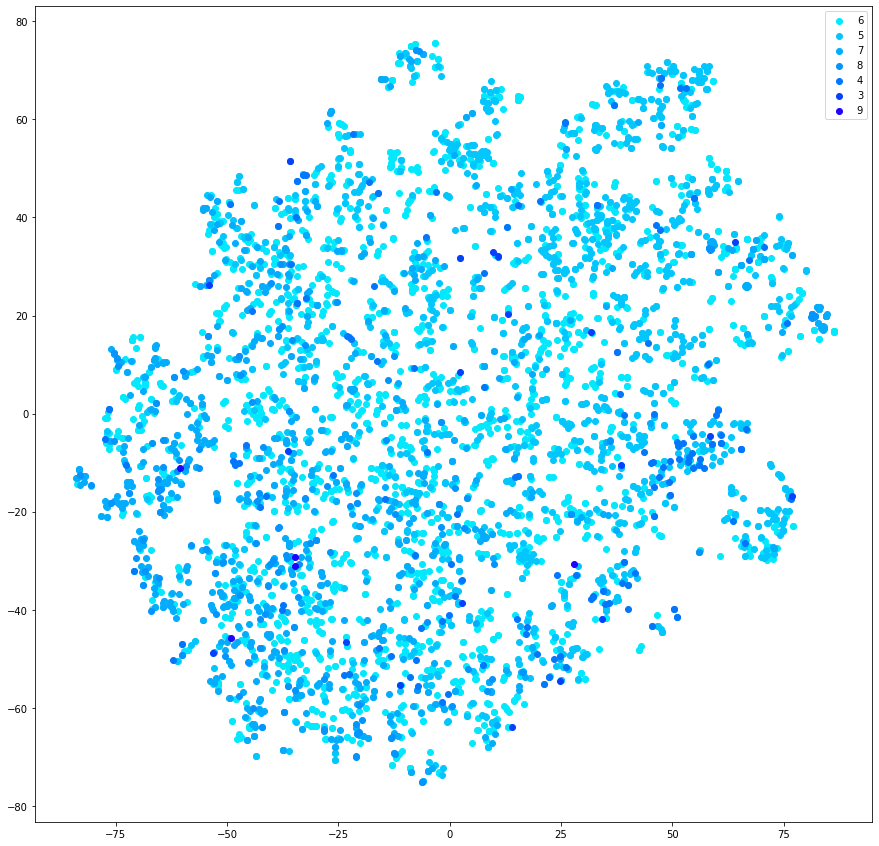

In [10]:
# Transformacja danych do przestrzeni 2D
model = TSNE(learning_rate=100)
transformed = model.fit_transform(X)

xs=transformed[:,0]
ys=transformed[:,1]

# Wykres w oparciu o dane przetransformowane do przestrzeni 2D
blue1 = Y == pie_labels[0]
blue2 = Y == pie_labels[1]
blue3 = Y == pie_labels[2]
blue4 = Y == pie_labels[3]
blue5 = Y == pie_labels[4]
blue6 = Y == pie_labels[5]
blue7 = Y == pie_labels[6]

fig, subplots = plt.subplots(1,1,figsize=(15,15))
ax = subplots
ax.scatter(xs[blue1],ys[blue1], c=colors[0], label = pie_labels[0])
ax.scatter(xs[blue2],ys[blue2], c=colors[1], label = pie_labels[1])
ax.scatter(xs[blue3],ys[blue3], c=colors[2], label = pie_labels[2])
ax.scatter(xs[blue4],ys[blue4], c=colors[3], label = pie_labels[3])
ax.scatter(xs[blue5],ys[blue5], c=colors[4], label = pie_labels[4])
ax.scatter(xs[blue6],ys[blue6], c=colors[5], label = pie_labels[5])
ax.scatter(xs[blue7],ys[blue7], c=colors[6], label = pie_labels[6])
ax.legend()
plt.show()

In [11]:
# Obliczanie brakujących wartości w każdej z kolumn
null_values = data.isnull().sum(axis=0)
print(null_values)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


**Wniosek:** W żadnej z kolumn nie ma brakujących wartości

In [12]:
# Wyświetlenie typu danych dla każdej z kolumn
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


<div style="text-align: justify"><strong>Wniosek:</strong> W każdej z kolumn z danymi fizykochemicznymi znajdują się liczby typu float64, natomiast etykietami są liczby typu int64. Zatem kodowanie nie jest potrzebne - wszystkie dane są liczbowe, w zbiorze nie występują dane kategoryczne.</div></p>

In [13]:
# Sprawdzenie czy w zbiorze danych są wartości NaN
data.isnull().values.any()

False

**Wniosek:** W zbiorze danych nie ma wartości NaN.

In [14]:
quality_number

array([3, 4, 5, 6, 7, 8, 9], dtype=int64)

#### Selekcja cech

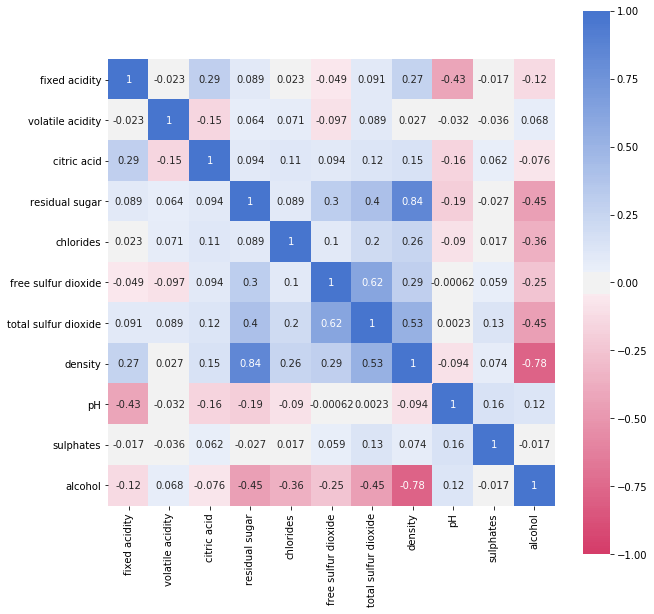

In [15]:
# Zastosowanie współczynnika korelacji - szukam cech o współczynniku korelacji bliskiemu 0
corr = X.corr()
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(0, 256, n=200),square=True, ax=ax, annot=True)

In [16]:
# Wartości bezwzględne współczynnika korelacji
abs_corrcoef = pd.DataFrame(np.absolute(np.corrcoef(X.T)))

# Szukanie wartości najbliższych 0 dla każdej z kolumn
minimum_value = abs_corrcoef.min(axis=1)
index_of_min = abs_corrcoef.idxmin(axis=1)
for i in range(X.shape[1]):
    print("Wartość najbliższa zeru dla cechy {} występuje w połączeniu z cechą {}. Wartość {}.".format(data.columns[i], data.columns[index_of_min[i]], np.round(minimum_value[i],4)))

Wartość najbliższa zeru dla cechy fixed acidity występuje w połączeniu z cechą sulphates. Wartość 0.0171.
Wartość najbliższa zeru dla cechy volatile acidity występuje w połączeniu z cechą fixed acidity. Wartość 0.0227.
Wartość najbliższa zeru dla cechy citric acid występuje w połączeniu z cechą sulphates. Wartość 0.0623.
Wartość najbliższa zeru dla cechy residual sugar występuje w połączeniu z cechą sulphates. Wartość 0.0267.
Wartość najbliższa zeru dla cechy chlorides występuje w połączeniu z cechą sulphates. Wartość 0.0168.
Wartość najbliższa zeru dla cechy free sulfur dioxide występuje w połączeniu z cechą pH. Wartość 0.0006.
Wartość najbliższa zeru dla cechy total sulfur dioxide występuje w połączeniu z cechą pH. Wartość 0.0023.
Wartość najbliższa zeru dla cechy density występuje w połączeniu z cechą volatile acidity. Wartość 0.0271.
Wartość najbliższa zeru dla cechy pH występuje w połączeniu z cechą free sulfur dioxide. Wartość 0.0006.
Wartość najbliższa zeru dla cechy sulphates w

**Wnioski:**
Najniższy współczynnik korelacji wystąpił dla par cech: 'free sulfur dioxide' i 'pH', 'total sulfur dioxide' i 'pH', 'sulphates' i 'chlorides', 'fixed acidity' i 'sulphates' oraz 'alcohol' i 'sulphates'.

**Hipoteza:**
Najbardziej nieskorelowane ze sobą cechy to: 'free sulfur dioxide', 'pH', 'total sulfur dioxide', 'sulphates', 'chlorides', 'fixed acidity' oraz 'alcohol'.

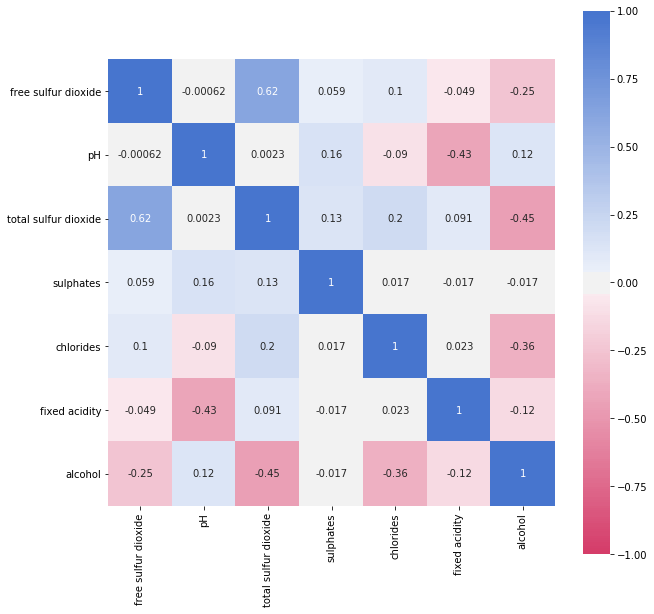

In [17]:
# Sprawdzam współczynniki korelacji dla wszystkich kombinacji wytypowanych cech.
new_columns = ['free sulfur dioxide', 'pH', 'total sulfur dioxide', 'sulphates', 'chlorides', 'fixed acidity', 'alcohol']
X2 = pd.DataFrame(X, columns=new_columns)
corr2 = X2.corr()
fig2, ax2 = plt.subplots(figsize=(10,10))
ax2 = sns.heatmap(corr2, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(0, 256, n=200),square=True, ax=ax2, annot=True)

<p><div style="text-align: justify"><strong>Wnioski:</strong> Wysoką wartość współczynnika korelacji osiągnęła para cech 'total sulfur dioxide' i 'free sulfur dioxide' (0,62). Umiarkowanie skorelowane (wartość współczynnika korelacji [0,4; 0,6]) są natomiast: 'pH' i 'fixed acidity' oraz 'total sulfur dioxide' i 'alcohol'. Pozostałe pary cech charakteryzują się niską bądź słabą korelacją.</div></p>

<p><div style="text-align: justify">Do dalszych obserwacji wybieram cechy: 'free sulfur dioxide', 'pH', 'sulphates' oraz 'chlorides'.</div></p>

In [18]:
newest_columns = [ 'free sulfur dioxide', 'pH', 'sulphates', 'chlorides']

In [19]:
wine_data = X[newest_columns]
wine_data

,free sulfur dioxide,pH,sulphates,chlorides
0,0.149826,0.254545,0.267442,0.106825
1,0.041812,0.527273,0.313953,0.118694
2,0.097561,0.490909,0.255814,0.121662
3,0.156794,0.427273,0.209302,0.145401
4,0.156794,0.427273,0.209302,0.145401
...,...,...,...,...
4893,0.076655,0.500000,0.325581,0.089021
4894,0.191638,0.390909,0.279070,0.112760
4895,0.097561,0.245455,0.279070,0.094955
4896,0.062718,0.563636,0.186047,0.038576


#### Obcinanie próbek odstających

In [20]:
# Obliczanie rozstępu ćwiartkowego dla każdej z kolumn
wine_data_copy = wine_data.copy()
q1 = wine_data_copy.quantile(0.25)
q3 = wine_data_copy.quantile(0.75)
iqr = q3 - q1
print(iqr)

free sulfur dioxide    0.080139
pH                     0.172727
sulphates              0.162791
chlorides              0.041543
dtype: float64


In [21]:
# Obcinanie wartości poniżej -1.5 IQR i powyżej +1.5 IQR
new_wine_data = wine_data_copy.copy()

for i in range(wine_data_copy.shape[1]-1):
    for j in range(wine_data_copy.shape[0]):
        if (wine_data_copy.iloc[j,i] < (q1[i] - 1.5 * iqr[i])):
            new_wine_data.iloc[j,i] = q1[i] - 1.5 * iqr[i]
        elif(wine_data_copy.iloc[j,i] > (q3[i] + 1.5 * iqr[i])):
            new_wine_data.iloc[j,i] = q3[i] + 1.5 * iqr[i]

In [22]:
new_wine_data.shape

(4898, 4)

In [23]:
wine_data_copy.shape

(4898, 4)

### Nauka modeli klasyfikatorów

#### Podział na zbiór testowy i treningowy z uwzględnieniem stratyfikacji

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(new_wine_data, Y, test_size=0.2, random_state=150, stratify=Y)

In [25]:
# Sprawdzenie liczby próbek każdej z klas w zbiorze treningowym
for i in range (len(quality_number)):
    print("Liczba próbek w zbiorze treningowym z klasy {} wynosi {}".format(quality_number[i], X_train.where(Y_train!=quality_number[i]).isna().sum()[0]))

Liczba próbek w zbiorze treningowym z klasy 3 wynosi 16
Liczba próbek w zbiorze treningowym z klasy 4 wynosi 130
Liczba próbek w zbiorze treningowym z klasy 5 wynosi 1166
Liczba próbek w zbiorze treningowym z klasy 6 wynosi 1758
Liczba próbek w zbiorze treningowym z klasy 7 wynosi 704
Liczba próbek w zbiorze treningowym z klasy 8 wynosi 140
Liczba próbek w zbiorze treningowym z klasy 9 wynosi 4


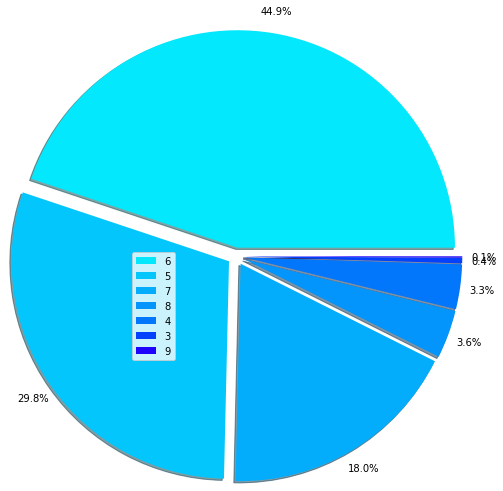

In [26]:
# Procentowa zawartość próbek poszczególnych klas w zbiorze treningowym
train_class_quantity = [1758,1166,704,140,130,16,4] #zgodnie z kolejnością etykiet w pie_labels
plt.pie(train_class_quantity, explode=explode_pie, labels=pie_labels, labeldistance=None, autopct='%1.1f%%', pctdistance=1.1, colors=colors, shadow=True, radius=2.5)
plt.legend()
plt.show()

In [27]:
# Sprawdzenie liczby próbek każdej z klas w zbiorze testowym
for i in range (len(quality_number)):
    print("Liczba próbek w zbiorze treningowym z klasy {} wynosi {}".format(quality_number[i], X_test.where(Y_test!=quality_number[i]).isna().sum()[0]))

Liczba próbek w zbiorze treningowym z klasy 3 wynosi 4
Liczba próbek w zbiorze treningowym z klasy 4 wynosi 33
Liczba próbek w zbiorze treningowym z klasy 5 wynosi 291
Liczba próbek w zbiorze treningowym z klasy 6 wynosi 440
Liczba próbek w zbiorze treningowym z klasy 7 wynosi 176
Liczba próbek w zbiorze treningowym z klasy 8 wynosi 35
Liczba próbek w zbiorze treningowym z klasy 9 wynosi 1


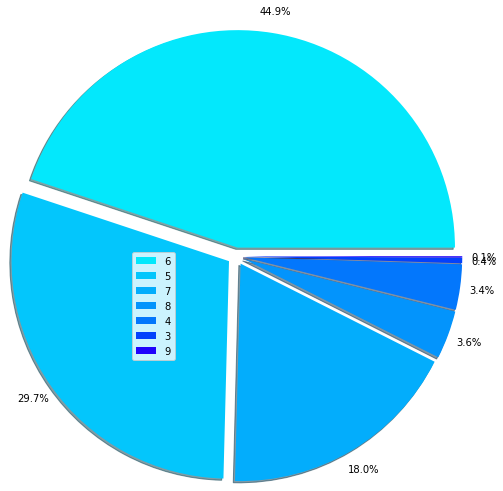

In [28]:
# Procentowa zawartość próbek poszczególnych klas w zbiorze testowym
train_class_quantity = [440, 291, 176, 35, 33, 4, 1] #zgodnie z kolejnością etykiet w pie_labels
plt.pie(train_class_quantity, explode=explode_pie, labels=pie_labels, labeldistance=None, autopct='%1.1f%%', pctdistance=1.1, colors=colors, shadow=True, radius=2.5)
plt.legend()
plt.show()

**Wniosek:** Stratyfikacja przeprowadzona prawidłowo, gdyż prporcje przykładów każdej z klas są takie, jak dla pierwotnego zbioru.

#### Nauka modeli + dobór hiperparametrów

In [29]:
# Klasyfikator NN
p = [1,2] #1 - odległość Manhattan, 2 - odległość Euklidesowa

NN_hyperparameters = dict(p = p)
NN_classifier = KNeighborsClassifier(n_neighbors=1)
NN_search = GridSearchCV(NN_classifier, NN_hyperparameters, cv=4)
NN_best_model = NN_search.fit(X_train, np.ravel(Y_train))
print('Najlepszy parametr p dla klasyfikatora NN to: ', NN_best_model.best_estimator_.get_params()['p'])

Najlepszy parametr p dla klasyfikatora NN to:  1


In [30]:
# Klasyfikator kNN
p = [1,2] #1 - odległość Manhattan, 2 - odległość Euklidesowa
n_neighbors = list(range(2,30))

kNN_hyperparameters = dict(n_neighbors=n_neighbors, p=p)
kNN_classifier = KNeighborsClassifier()
kNN_search = GridSearchCV(kNN_classifier, kNN_hyperparameters, cv=4)
kNN_best_model = kNN_search.fit(X_train, np.ravel(Y_train))
print('Najlepszy parametr n_neighbors dla klasyfikatora kNN to: ', kNN_best_model.best_estimator_.get_params()['n_neighbors'])
print('Najlepszy parametr p dla klasyfikatora kNN to: ', kNN_best_model.best_estimator_.get_params()['p'])

Najlepszy parametr n_neighbors dla klasyfikatora kNN to:  2
Najlepszy parametr p dla klasyfikatora kNN to:  2


In [31]:
# Klasyfikator NM
NM_distances = ['euclidean', 'manhattan']

NM_hyperparameters = dict(metric = NM_distances)
NM_classifier = NearestCentroid()
NM_search = GridSearchCV(NM_classifier, NM_hyperparameters, cv=4)
NM_best_model = NM_search.fit(X_train, np.ravel(Y_train))
print('Najlepszy sposób obliczania odległości dla klasyfikatora NM to: ', NM_best_model.best_estimator_.get_params()['metric'])

Najlepszy sposób obliczania odległości dla klasyfikatora NM to:  manhattan


In [32]:
# Klasyfikator k-means
n_clusters = list(range(2,10))
random_state = [0, 42] 

kmeans_parameters = dict(n_clusters=n_clusters, random_state=random_state)
kmeans_classifier = KMeans()
kmeans_search = GridSearchCV(kmeans_classifier, kmeans_parameters, cv=4)
kmeans_best_model = kmeans_search.fit(X_train, np.ravel(Y_train))
print("Najlepszy parametr n_clusters dla klasyfikatora k-means to: ", kmeans_best_model.best_estimator_.get_params()['n_clusters'])
print("Najlepszy parametr random_state dla klasyfikatora k-means to: ", kmeans_best_model.best_estimator_.get_params()['random_state'])

Najlepszy parametr n_clusters dla klasyfikatora k-means to:  9
Najlepszy parametr random_state dla klasyfikatora k-means to:  42


In [33]:
# Klasyfikator DummyClassifier
dummy_strategy = ['stratified', 'most_frequent']

dummy_parameters = dict(strategy = dummy_strategy, random_state=random_state)
dummy_classifier = DummyClassifier()
dummy_search = GridSearchCV(dummy_classifier, dummy_parameters, cv=4)
dummy_best_model = dummy_search.fit(X_train, np.ravel(Y_train))
print('Najlepszy parametr strategy dla klasyfikatora DummyClassifier to: ', dummy_best_model.best_estimator_.get_params()['strategy'])
print("Najlepszy parametr random_state dla klasyfikatora DummyClassifier to: ", dummy_best_model.best_estimator_.get_params()['random_state'])

Najlepszy parametr strategy dla klasyfikatora DummyClassifier to:  most_frequent
Najlepszy parametr random_state dla klasyfikatora DummyClassifier to:  0


### Porównanie klasyfikatorów

#### Sprawdzenie skuteczności modeli na zbiorze testowym
<div style="text-align: justify">Sprawdzam accuracy dla powyższych klasyfikatorów dla optymalnych hiperparametrów.</div>

In [34]:
# Zdefiniowanie klasyfikatorów i nauczenie o wybranych parametrach
NN_clf = KNeighborsClassifier(n_neighbors=1, p=1).fit(X_train, np.ravel(Y_train))
kNN_clf = KNeighborsClassifier(n_neighbors=2, p=2).fit(X_train, np.ravel(Y_train))
NM_clf = NearestCentroid(metric='manhattan').fit(X_train, np.ravel(Y_train))
kmeans_clf = KMeans(n_clusters=9, random_state=42).fit(X_train, np.ravel(Y_train))
dummy_clf = DummyClassifier(strategy='most_frequent', random_state=0).fit(X_train, np.ravel(Y_train))

# Przewidywanie etykiet dla próbek zbioru testowego
NN_predicted = NN_clf.predict(X_test)
kNN_predicted = kNN_clf.predict(X_test)
NM_predicted = NM_clf.predict(X_test)
kmeans_predicted = kmeans_clf.predict(X_test)
dummy_predicted = dummy_clf.predict(X_test)

# Przyporządkowanie etykiet do wyniku klasteryzacji k-means
kmeans_labels = np.zeros_like(kmeans_predicted)
for i in range(9):
    mask = (kmeans_predicted == i)
    kmeans_labels[mask] = mode(Y_test[mask])[0]

# Obliczenie accuracy
NN_accuracy = np.round(accuracy_score(Y_test, NN_predicted),2)
kNN_accuracy = np.round(accuracy_score(Y_test, kNN_predicted),2)
NM_accuracy = np.round(accuracy_score(Y_test, NM_predicted),2)
kmeans_accuracy = np.round(accuracy_score(Y_test, kmeans_labels),2)
dummy_accuracy = np.round(accuracy_score(Y_test, dummy_predicted),2)

# Wyświetlenie wyników
print('Dokładność klasyfikacji dla poszczególnych klasyfikatorów:')
print('NN: ', NN_accuracy)
print('kNN: ', kNN_accuracy)
print('NM: ', NM_accuracy)
print('kmeans: ', kmeans_accuracy)
print('DummyClassifier: ', dummy_accuracy)

Dokładność klasyfikacji dla poszczególnych klasyfikatorów:
NN:  0.62
kNN:  0.52
NM:  0.16
kmeans:  0.45
DummyClassifier:  0.45


<div style='text-align: justify'><strong>Wnioski:</strong> Najlepszą skutecznością klasyfikacji wśród porównywanych klasyfikatorów charakteryzuje się klasyfikator najbliższego sąsiada (NN_classifier), który jako jedyny uzyskał ponad 60% skuteczność. Nieco gorzej wypadł w tym porównaniu klasyfikator k najbliższych sąsiadów (kNN) oraz klasyfikatory k-means i DummyClassifier (odpowiednio 52 i po 45% poprawnie sklasyfikowanych próbek). Najgorzej wypadł klasyfikator NM. Procent poprawnie sklasyfikowanych próbek przy pomocy tego klasyfikatora wynosi poniżej 20%</div>

#### Wyświetlenie macierzy pomyłek

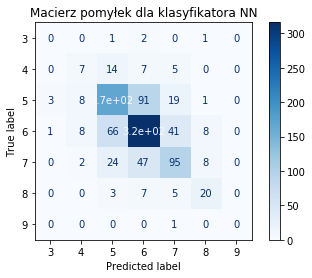

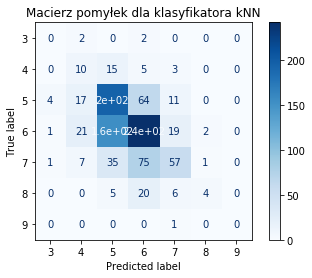

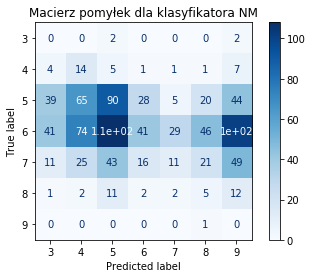

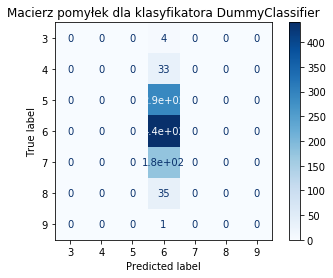

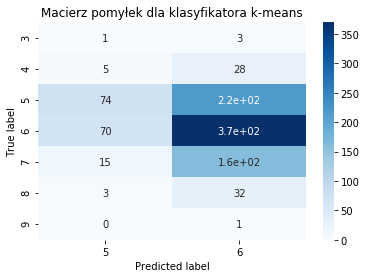

In [35]:
cm_options = [("Macierz pomyłek dla klasyfikatora NN", NN_clf), 
              ("Macierz pomyłek dla klasyfikatora kNN", kNN_clf), 
              ("Macierz pomyłek dla klasyfikatora NM", NM_clf), 
              ("Macierz pomyłek dla klasyfikatora DummyClassifier", dummy_clf)]

for title, classifier in cm_options:
    displaing = plot_confusion_matrix(classifier, X_test, Y_test, 
                                      display_labels=quality_number,
                                     cmap=plt.cm.Blues)
    displaing.ax_.set_title(title)

plt.show()

data_for_cm = {'y_Actual': Y_test.values.ravel(), 'y_Predicted': kmeans_labels}
dfkmeans = pd.DataFrame(data_for_cm, columns=['y_Actual','y_Predicted'])
confusion_matrix_kmeans = pd.crosstab(dfkmeans['y_Actual'], dfkmeans['y_Predicted'], rownames=['True label'], colnames=['Predicted label'], margins = False)
plt.title("Macierz pomyłek dla klasyfikatora k-means")
sn.heatmap(confusion_matrix_kmeans, annot=True, cmap = plt.cm.Blues)
plt.show()

<p><div style="text-align: justify"><strong>Wnioski:</strong> 100% skuteczny klasyfikator posiada jedynie dane na głównej przekątnej macierzy pomyłek. Porównując powyższe macierze wizualnie najbliżej tej tendencji jest dla zbioru próbek win białych klasyfikator najbliższego sąsiada. Podczas obserwacji macierzy można zauważyć również, że klasyfikator DummyClassifier przyporządkował wszystkie próbki do klasy 6, czyli najliczniejszej klasy zbioru. Klasyfikator k-means przyporządkował próbki do jednej z dwóch najliczniejszych klas.</div></p>

<p><div style="text-align: justify">Dokładność klasyfikacji nie jest metryką pozwalającą na ostateczne określenie jak dobry jest klasyfikator. Jednak dla omawianego zbioru trudno jest jednoznacznie określić jaka inna metryka mogłaby pomóc rozstrzygnąć ten problem. Ważne jest zarówno niezaklasyfikowanie próbki wina o gorszej jakości jako lepszego, ani wina lepszej jakości jako gorszego. Z punktu widzenia klienta lepiej, żeby lepsze wino było zaklasyfikowane jako gorsze. W przeciwnym wypadku straci zaufanie do prezentowanej jakości. Dodatkową trudnością jest fakt, że zbiór danych dotyczących win białych posiada próbki należace do 7 różnych klas jakości (3, 4, 5, 6, 7, 8, 9). Aby móc obliczyć wartość błędu typu pierwszego, czy drugiego, tudzież dowolnej innej metryki związanej bezpośrednio z wartościami zapisywanymi w klasycznej macierzy pomyłek (TP, TN, FP, FN) należy przeprowadzić analizę dla każdej z klas jakości osobno po transformacji one-vs-rest. Zgodnie z tym, co przedstawiłam wcześniej należałoby dążyć do minimalizacji błędu typu drugiego dla próbek o klasach jakości 3-6 włącznie i minimalizacji błędu typu pierwszego dla próbek o klasach jakości 7-9 włącznie.</div></p>

<p><div style="text-align: justify">Innym podejściem, które najlepiej odpowiadałoby rozpatrywanemu zbiorowi danych będzie minimalizacja wartości powyżej głównej przekątnej macierzy. Wtedy minimalizowany będzie błąd klasyfikacji wina białego niższej jakości jako wina wyższej jakości na rzecz błędu klasyfikacji wina wyższej jakości jako wina niższej jakości. Gdyby tego typu błąd ograniczyć do zera, uzyskałoby się macierz trójkątną dolną.</div></p>

#### Obliczenie błędu typu 1 i 2 dla odpowiednich klas jakości (zgodnie z powyższym)

In [36]:
# Obliczenie macierzy pomyłek metodą OvR
NN_multi_cm = multilabel_confusion_matrix(Y_test, NN_predicted)
kNN_multi_cm = multilabel_confusion_matrix(Y_test, kNN_predicted)
NM_multi_cm = multilabel_confusion_matrix(Y_test, NM_predicted)
kmeans_multi_cm = multilabel_confusion_matrix(Y_test, kmeans_labels)
DummyClassifier_multi_cm = multilabel_confusion_matrix(Y_test, dummy_predicted)

print(NN_multi_cm) # Wyświetlenie przykładowego wyniku

# Zliczenie błędów typu 1 dla klas 7-9 oraz typu 2 dla klas 3-6
col_names = ['3', '4', '5', '6', '7', '8', '9', 'suma']

errors_summary = np.zeros((5,8))
multi_cms = [NN_multi_cm, kNN_multi_cm, NM_multi_cm, kmeans_multi_cm, DummyClassifier_multi_cm]
for cm in range(len(multi_cms)):
    for i in range(4):
        errors_summary[cm][i] = multi_cms[cm][i,1,0]
    for j in range(3):
        errors_summary[cm][j+4] = multi_cms[cm][j+4,0,1]
    errors_summary[cm][7] = errors_summary[cm][:7].sum()

errors_summary = pd.DataFrame(errors_summary, columns=col_names, index=['NN','kNN','NM','k-means','DummyClassifier'], dtype=int)

[[[972   4]
  [  4   0]]

 [[929  18]
  [ 26   7]]

 [[581 108]
  [122 169]]

 [[386 154]
  [124 316]]

 [[733  71]
  [ 81  95]]

 [[927  18]
  [ 15  20]]

 [[979   0]
  [  1   0]]]


In [37]:
# Podsumowanie wartości błędów 2 typu dla jakości wina 3, 4, 5, 6 
# oraz 1 typu dla jakości wina 7, 8, 9
errors_summary

,3,4,5,6,7,8,9,suma
NN,4,26,122,124,71,18,0,365
kNN,4,23,96,198,40,3,0,364
NM,4,19,201,399,37,89,215,964
k-means,4,33,217,70,0,0,0,324
DummyClassifier,4,33,291,0,0,0,0,328


#### Obliczenie błędów przez zsumowanie wartości powyżej głównej przekątnej macierzy pomyłek

In [38]:
NN_cm = confusion_matrix(Y_test, NN_predicted)
kNN_cm = confusion_matrix(Y_test, kNN_predicted)
NM_cm = confusion_matrix(Y_test, NM_predicted)
kmeans_cm = confusion_matrix(Y_test, kmeans_labels)
dummy_cm = confusion_matrix(Y_test, dummy_predicted)

NN_cm_copy = NN_cm.copy()
kNN_cm_copy = kNN_cm.copy()
NM_cm_copy = NM_cm.copy()
kmeans_cm_copy = kmeans_cm.copy()
dummy_cm_copy = dummy_cm.copy()

# Wyznaczenie macierzy trójkątnych
NN_CM_tri = np.tril(NN_cm_copy, k=1)
kNN_CM_tri = np.tril(kNN_cm_copy, k=1)
NM_CM_tri = np.tril(NM_cm_copy, k=1)
kmeans_CM_tri = np.tril(kmeans_cm_copy, k=1)
dummy_CM_tri = np.tril(dummy_cm_copy, k=1)

# Obliczenie sum wartości powyżej głównej przekątnej
NN_my_error = (NN_cm - NN_CM_tri).sum()
kNN_my_error = (kNN_cm - kNN_CM_tri).sum()
NM_my_error = (NM_cm - NM_CM_tri).sum()
kmeans_my_error = (kmeans_cm - kmeans_CM_tri).sum()
dummy_my_error = (dummy_cm - dummy_CM_tri).sum()

# Wyświetlenie obliczonych błędów
print("Wartość błędu dla klasyfikatora: ")
print("- NN: ", NN_my_error)
print("- kNN: ", kNN_my_error)
print("- NM: ", NM_my_error)
print("- kmeans: ", kmeans_my_error)
print("- dummy: ", dummy_my_error)

Wartość błędu dla klasyfikatora: 
- NN:  44
- kNN:  23
- NM:  279
- kmeans:  32
- dummy:  37


<p><div style="text-align: justify"><strong>Wnioski:</strong> Według pierwszego z zastosowanych przeze mnie sposobów wyznaczania błędu (suma błędów 2 rodzaju dla próbek klas 3-6 oraz błędów 1 rodzaju dla próbek klas 7-9) najmniejszy błąd wygenerował klasyfikator k-means (324 błędy), niewiele więcej (328 błędów) wygenerował klasyfikator DummyClassifier. Stanowi to odpowiednio 6,6% oraz 6,7% wszystkich próbek win.</div></p>

<p><div style="text-align: justify">Biorąc pod uwagę drugi zastosowany przez mnie sposób obliczania błędu, a więc ilość próbek wina zaklasyfikowanych do grupy o wyższej jakości niż ich rzeczywista, najlepszy wynik uzyskał klsyfikator kNN - 23 błędnie sklasyfikowane próbki. Klasyfikator o najwyższym accuracy (NN) plasuje się w tym porównaniu dopiero na trzecim miejscu z 44 błędnie sklasyfikowanymi próbkami.</div></p>

<p><div style="text-align: justify">Uważam, że lepszej oceny klasyfikartora można dokonać stosując drugą z zastosowanych przeze mnie metod oceny błędu.</div></p>

#### Zużycie pamięci i czasu podczas uczenia każdego z klasyfikatorów

In [ ]:
pip install -U memory_profiler

In [40]:
%load_ext memory_profiler

In [41]:
# Klasyfikator najbliższego sąsiada
%memit NN_clf = KNeighborsClassifier(n_neighbors=1, p=1).fit(X_train, np.ravel(Y_train))
%timeit NN_clf = KNeighborsClassifier(n_neighbors=1, p=1).fit(X_train, np.ravel(Y_train))

peak memory: 166.13 MiB, increment: 0.16 MiB
4.15 ms ± 32.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [42]:
# Klasyfikator k najbliższych sąsiadów
%memit kNN_clf = KNeighborsClassifier(n_neighbors=2, p=2).fit(X_train, np.ravel(Y_train))
%timeit kNN_clf = KNeighborsClassifier(n_neighbors=2, p=2).fit(X_train, np.ravel(Y_train))

peak memory: 166.33 MiB, increment: 0.00 MiB
4.28 ms ± 97 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [43]:
# Klasyfikator najbliższej średniej
%memit NM_clf = NearestCentroid(metric='manhattan').fit(X_train, np.ravel(Y_train))
%timeit NM_clf = NearestCentroid(metric='manhattan').fit(X_train, np.ravel(Y_train))

peak memory: 166.50 MiB, increment: 0.05 MiB
1.59 ms ± 15.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [44]:
# Klasyfikator k-najbliższych średnich
%memit kmeans_clf = KMeans(n_clusters=9, random_state=42).fit(X_train, np.ravel(Y_train))
%timeit kmeans_clf = KMeans(n_clusters=9, random_state=42).fit(X_train, np.ravel(Y_train))

peak memory: 167.46 MiB, increment: 0.93 MiB
271 ms ± 21.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [45]:
# Klasyfikator DummyClassifer
%memit dummy_clf = DummyClassifier(strategy='most_frequent', random_state=0).fit(X_train, np.ravel(Y_train))
%timeit dummy_clf = DummyClassifier(strategy='most_frequent', random_state=0).fit(X_train, np.ravel(Y_train))

peak memory: 167.46 MiB, increment: 0.00 MiB
186 µs ± 535 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


<div style="text-align: justify"><strong>Wnioski:</strong> Wszystkie z omawianych klasyfikatorów zużywają podobną ilość pamięci. Zdecydowanie najszybszy jest klasyfikator DummyClassifier, a najwolniejszy - klasyfikator k-najbliższych średnich.</div>

### Podsumowanie

<p><div style="text-align: justify">Pierwszym etapem pracy nad projektem była eksploracyjna analiza danych i ich przetworzenie. Analizowany zbiór próbek wina białego składał się z 4898 próbek należących do 7 klas 10-stopniowej jakości wina. Ilość próbek w poszczególnych klasach jakości znacznie się różniła - najliczniejsza klasa (6) zawierała 2198 próbek, a najmniej liczna (9) jedynie 5 próbek. W zbiorze nie wystąpiły brakujące wartości, ani wartości NaN, a wszystkie kolumny cech były wartościami liczbowymi oznaczającymi właściwości fizykochemiczne wina białego. Etykiety były liczbami całkowitymi.</div></p>

<p><div style="text-align: justify">Po przetransformowaniu próbek przy pomocy algorytmu TSNE do dwuwymiarowej przestrzeni cech widać, że próbki wszystkich klas są ze sobą wymieszane i nie tworzą łatwych do rozdzielenia grup. Jest to drugi obok braku równoliczności zbiorów klas problem, który przyczynił się do niewielkiej skuteczności klasyfikatorów.</div></p>

<p><div style="text-align: justify">W kolejnym etapie pracy nad projektem wybrano 4 najmniej skorelowane ze sobą cechy z 11 występujących w zbiorze. Były to cechy: 'free sulfur dioxide', 'pH', 'sulphates' oraz 'chlorides'. Po wybraniu cech obcięto próbki odstające i podzielono zbiór na treningowy i testowy z uwzględnieniem stratyfikacji. Następnie dobrano optymalne hiperparametry do każdego z klasyfikatorów.</div></p>

<H3>Porównanie klasyfikatorów</H3>

| Klasyfikator | Skuteczność [%] | Błąd (1 sposób)* | Błąd (2 sposób)** | Zużycie pamięci [MiB] | Średni czas [ms] |
|   :----:     |    :----:   |     :----:       |     :----:        |      :----:     |   :----:    |
|     **NN**      | 62 | 365 | 44 | 166,13 | 4,15 |
|    **kNN**       | 52 | 364 | 23 | 166,33 | 4,28 |
|     **NM**       | 16 | 964 | 279 | 166,50 | 1,59 |
|   **k-means**    | 45 | 324 | 32 | 167,46 | 271 |
| **DummyClassifier** | 45 | 328| 37 | 167,46 | 0,186 |

*Suma błędu 2 rodzaju dla klas 3-6 i błędu 1 rodzaju dla klas 7-9

**Suma próbek sklasyfikowanych do klasy wyższej niż rzeczywista

<p><div style="text-align: justify">Najlepszy pod względem dokładności klasyfikacji okazał się klasyfikator najbliższego sąsiada, który jako jedyny osiągnął ponad 60% skuteczność. Najgorzej spisał się klasyfikator najbliższej średniej, który sklasyfikował poprawnie jedynie 16% próbek. Najmniejszym błędem (1 sposób*) wykazał się klasyfikator k-means (324), a największym ponownie klasyfikator NM (964). Najmniejszą ilością próbek zaklasyfikowanych do wyższych klas jakości niż ich rzeczywiste charakteryzował się klasyfikator kNN (23 błędnie sklasyfikowane próbki), najgorszy pod tym względem ponownie okazał się klasyfikator najbliższej średniej. Wszystkie klasyfikator zużyły podobną ilość pamięci, jednak zdecydowanie najszybszy okazał się DummyClassifier (0,186 ms), a najwolniejszy - klasyfikator k-najbliższych średnich (271 ms).</div></p>

<p><div style="text-align: justify">Pod względem wszystkich porównywanych cech klasyfikatorów względem badanego zbioru, najmniej skuteczny okazał się klasyfikator najbliższej średniej. W statystykach tych dość dobrze wypadł klasyfikator k-means oraz DummyClassifier jednak należy pamiętać, że klasyfikatory te przyporządkowały próbki odpowiednio do 2 i 1 najliczniejszej klasy, co oznacza, że klasyfikowane w ten sposób wina należałyby do maksymalnie dwóch różnych klas jakości i 10-stopniowa skala straciłaby sens. Fakt, że zarówno klasyfikator k-means jak i klasyfikator NM nie poradziły sobie z klasyfikacją próbek wina białego wiąże się bezpośrednio z rozmieszczeniem próbek w przestrzeni cech. Oba te klasyfikatory traktują klasę próbek jako charakterystyczną grupę, natomiast próbki win nie stworzyły takowych grup. Zatem dwoma najlepszymi klasyfikatorami spośród 5 rozważanych są klasyfikatory NN i kNN. Pierwszy z nich charakteryzuje się wyższą skutecznością, natomiast drugi niższym błędem klasyfikacji wina do wyższych klas jakości niż rzeczywista. Pozostałe cechy obu klasyfikatorów kształtują się na podobnym poziomie. Aby kryterium jakości wina białego było wiarygdne klienci zwracali na nie uwagę należy dążyć do minimalizacji błędu klasyfikowania próbek wina do zawyżonych klas jakości, a więc pod tym względem lepszym klasyfikatorem okazuje się klasyfikator k-najbliższych sąsiadów. Warto zaznaczyć jednak, że 52% czy 62% skuteczności klasyfikacji próbek to w dalszym ciągu bardzo niska skuteczność klasyfikatora.</div></p>

**Rozwiązenie problemu:** Najlepszy klasyfikator dla zbioru próbek wina białego spośród banych klasyfikatorów to kNN dla k=2.